In [167]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [168]:
import pandas as pd
import numpy as np

In [169]:
%matplotlib inline

In [170]:
df = pd.read_csv("dataset/cosmetics_sales_data.csv")

df.head()

,Sales Person,Country,Product,Date,Amount ($),Boxes Shipped
0,Lucas Verma,Canada,Aloe Vera Gel,2022-04-30,7897.13,358
1,Ethan Reddy,UK,Aloe Vera Gel,2022-01-25,16376.88,449
2,Ananya Gupta,India,Body Butter Cream,2022-08-22,5599.68,264
3,Ananya Gupta,New Zealand,Salicylic Acid Cleanser,2022-08-26,2966.47,144
4,Sophia Nair,UK,Body Butter Cream,2022-05-19,6828.68,484


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   374 non-null    object 
 1   Country        374 non-null    object 
 2   Product        374 non-null    object 
 3   Date           374 non-null    object 
 4   Amount ($)     374 non-null    float64
 5   Boxes Shipped  374 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 17.7+ KB


In [172]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount ($)       0
Boxes Shipped    0
dtype: int64

In [173]:
df.describe(include='all')

,Sales Person,Country,Product,Date,Amount ($),Boxes Shipped
count,374,374,374,374,374.000000,374.000000
unique,10,6,15,193,NaN,NaN
top,Olivia D'Souza,USA,Hydrating Face Serum,2022-06-02,NaN,NaN
freq,47,75,31,6,NaN,NaN
mean,NaN,NaN,NaN,NaN,7778.353262,249.072193
std,NaN,NaN,NaN,NaN,5655.378093,144.235296
min,NaN,NaN,NaN,NaN,119.820000,10.000000
25%,NaN,NaN,NaN,NaN,3325.250000,140.000000
50%,NaN,NaN,NaN,NaN,6513.655000,246.000000
75%,NaN,NaN,NaN,NaN,11331.897500,364.000000


In [174]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Fill missing ratings with average
if 'Rating' in df.columns:
    df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# Convert 'Date' column to datetime if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [175]:
import matplotlib.pyplot as plt
import seaborn as sns


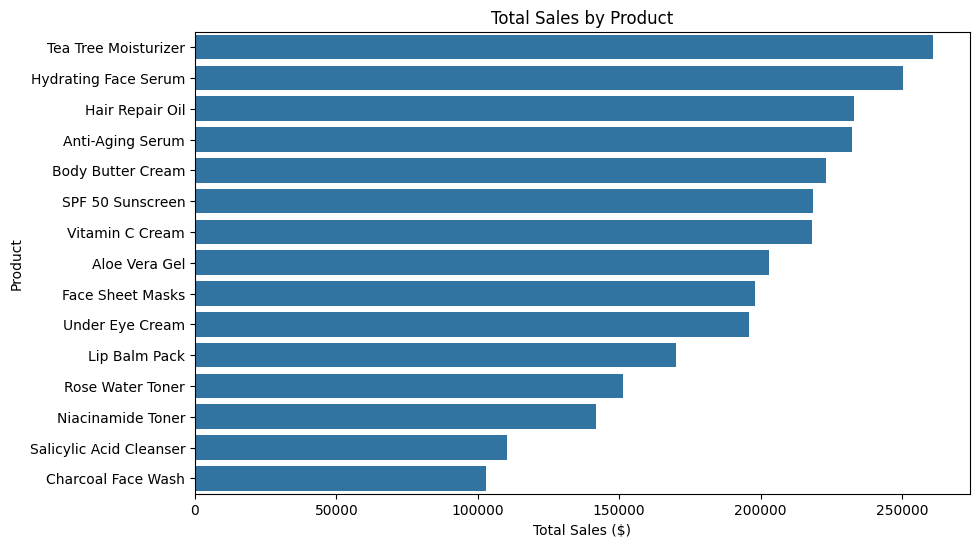

In [ ]:
#total sales by product

plt.figure(figsize=(10,6))
product_sales = df.groupby('Product')['Amount ($)'].sum().sort_values(ascending=False)
sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title('Total Sales by Product')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
plt.show()

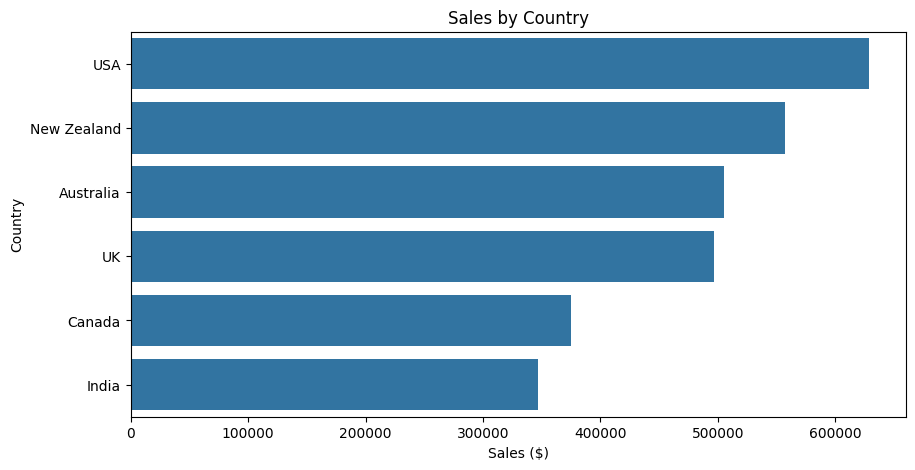

In [178]:
#sales by country

plt.figure(figsize=(10,5))
country_sales = df.groupby('Country')['Amount ($)'].sum().sort_values(ascending=False)
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title('Sales by Country')
plt.xlabel('Sales ($)')
plt.ylabel('Country')
plt.show()

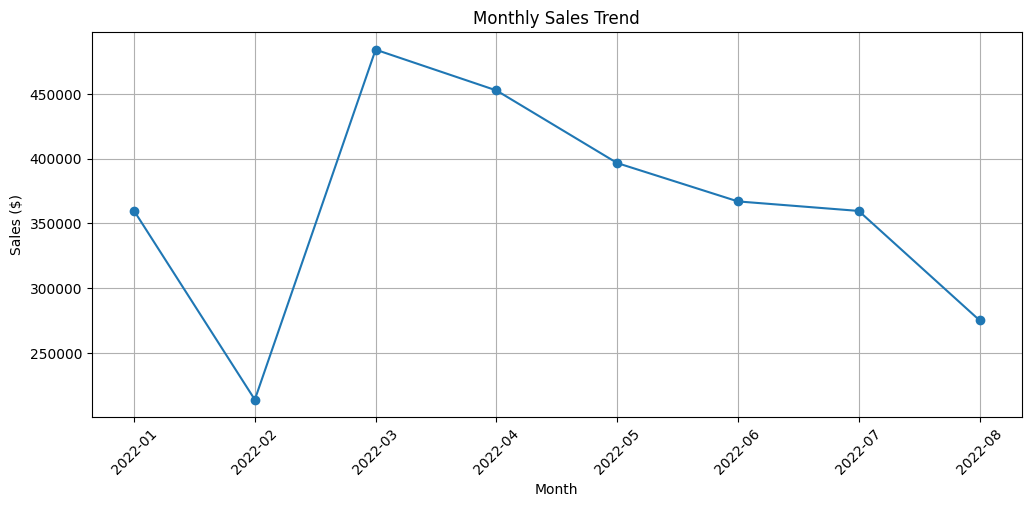

In [182]:
# monthly sales Trend

df['Month'] = df['Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Amount ($)'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


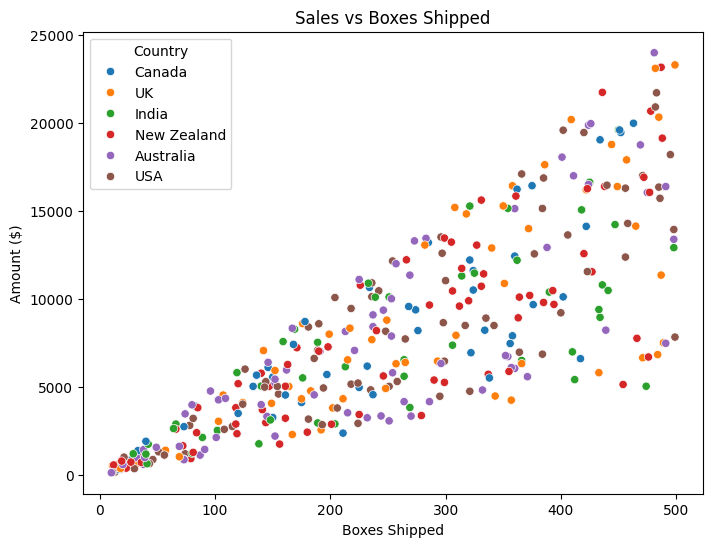

In [184]:
#sales Vs Boxes shipped

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Boxes Shipped', y='Amount ($)', hue='Country')
plt.title('Sales vs Boxes Shipped')
plt.show()

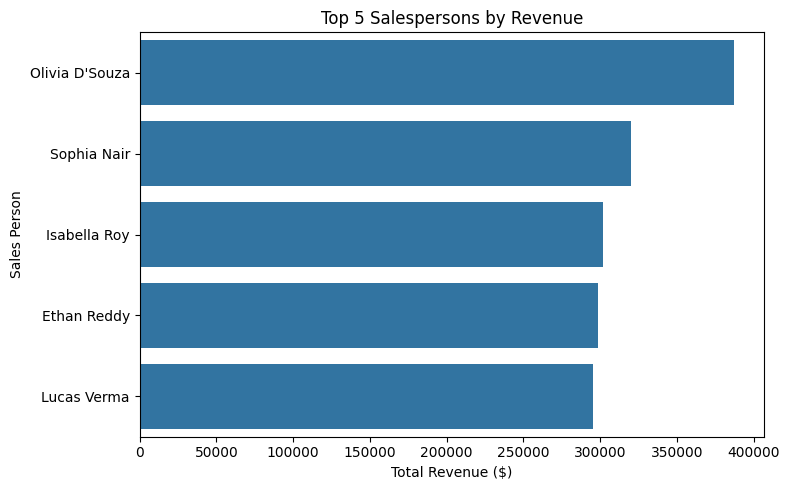

In [185]:
#Top 5 Salespersons by Revenue

top_salespeople = df.groupby('Sales Person')['Amount ($)'].sum().sort_values(ascending=False).head(5)

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_salespeople.values, y=top_salespeople.index)
plt.title('Top 5 Salespersons by Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Sales Person')
plt.tight_layout()
plt.show()


Average Sale per Box: $30.69


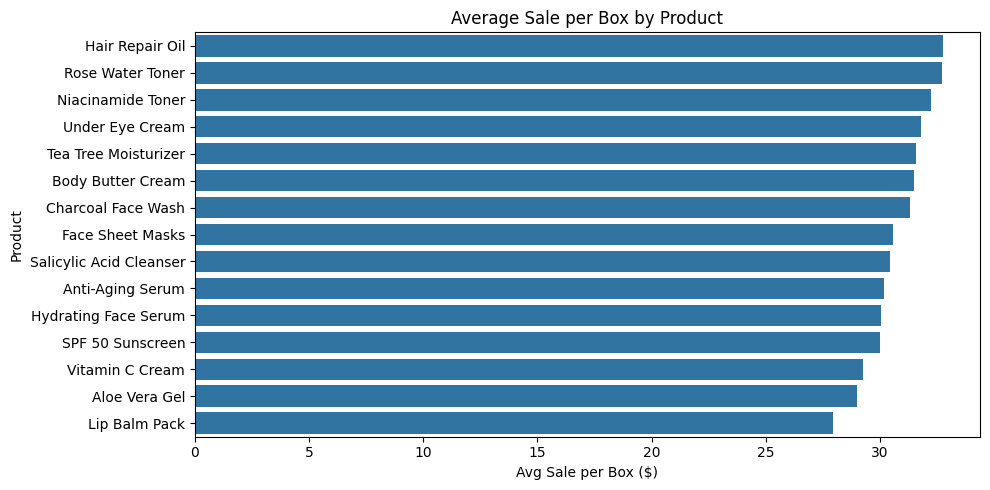

In [187]:
#Average Sale per Box (Unit Economics)

# Create a new column: revenue per box
df['Sale per Box'] = df['Amount ($)'] / df['Boxes Shipped']

# Average sale per box overall
avg_sale_per_box = df['Sale per Box'].mean()
print(f"Average Sale per Box: ${avg_sale_per_box:.2f}")

# Optional: Average sale per box by product
sale_per_box_by_product = df.groupby('Product')['Sale per Box'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=sale_per_box_by_product.values, y=sale_per_box_by_product.index)
plt.title('Average Sale per Box by Product')
plt.xlabel('Avg Sale per Box ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


       Country               Product  Amount ($)
0          USA      Anti-Aging Serum   113821.81
1    Australia       Hair Repair Oil    91002.87
2  New Zealand      SPF 50 Sunscreen    87897.03
3  New Zealand     Body Butter Cream    86730.86
4           UK  Hydrating Face Serum    75719.24
5           UK       Vitamin C Cream    72516.17
6    Australia  Tea Tree Moisturizer    65869.40
7          USA      Rose Water Toner    65113.68
8          USA     Niacinamide Toner    63166.53
9  New Zealand       Under Eye Cream    60475.28


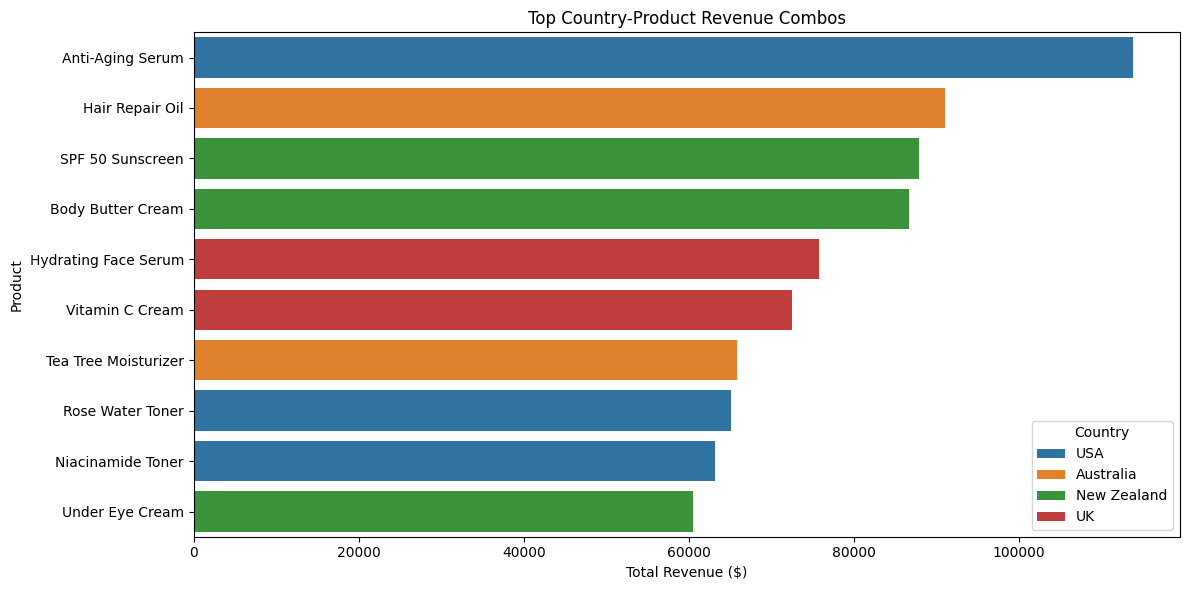

In [188]:
#Most Profitable Country-Product Combinations

# Group by Country and Product, sum revenue
country_product_sales = df.groupby(['Country', 'Product'])['Amount ($)'].sum().sort_values(ascending=False)

# Convert to DataFrame and reset index
top_country_product = country_product_sales.reset_index().head(10)

# Display
print(top_country_product)

# Optional: Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_country_product, x='Amount ($)', y='Product', hue='Country')
plt.title('Top Country-Product Revenue Combos')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product')
plt.legend(title='Country')
plt.tight_layout()
plt.show()
